In [3]:
# Import required package:
import math 
import numpy as np 
import matplotlib.pyplot as plt 

<span style="font-size: 36px;">Homework 1</span>

<span style="font-size: 24px;"> 1.Understanding round-off error </span>

(a) Assume b is positive, otherwise we can always achieve this by mupltiplying a factoc of (-1) on both sides of equation 
$$ax^2+bx+c=0$$

If b is vert large, the value of $\sqrt{b^2-4ac}$ shoule be very close to b itself. The large round-off error is generated when subtracting two very large and close numbers: $b$ and $\sqrt{b^2-4ac}$. 

(b)As described in (a), we can always assume b is positive number. The situation of large round-off erros occurs when calcualting one root
$$x=\frac{-b+\sqrt{b^2-4ac}}{2a}$$
To reduce the round-off error, an alternative but completely equivalent expression of this solution can be used:

$$x= \frac{-2c}{b+\sqrt{b^2-4ac}}$$

<span style="font-size: 24px;"> 2. Round-off error and accurate calculation of the exponential series</span>

(a) Use series expansion to calculate exponential function:
$$e^{x} \approx S_n(x) = \sum_{n=0}^{\infty} \frac{x^n}{n!} $$

In [38]:
def exp_Taylor_expansion(x,n):
    sum = 1
    for i in range(1,n+1):
        sum += ( x**i / math.factorial(i) ) # x^n / n!
    return sum 

(b) The error is defined as :
$$\epsilon_n = \frac{|e^x-S_n (x)|}{e^x}$$

In [39]:
#evaluate error at a very large positive number x_1 =20
x_1 = 20
ns = np.array(range(0,101)) # an array of n 
exp_expansion_1 = [exp_Taylor_expansion(x_1,n) for n in ns ]
exp_expansion_1 = np.array(exp_expansion_1)
exp_np_1 = np.exp(x_1)
epsilon_1 = np.abs(exp_expansion_1-exp_np_1) / exp_np_1
#evaluate error at a very large (absolute value) negative number x_2 =-20
x_2 = -20 
exp_expansion_2 = [exp_Taylor_expansion(x_2,n) for n in ns]
exp_expansion_2 = np.array(exp_expansion_2)
exp_np_2 = np.exp(x_2)
epsilon_2 = np.abs(exp_expansion_2-exp_np_2) / exp_np_2 


Text(0, 0.5, '')

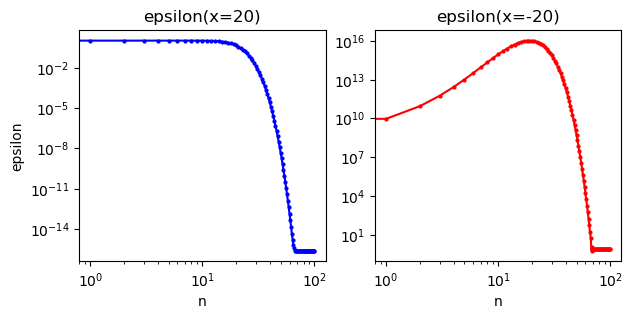

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(7,3))
ax1.loglog(ns, epsilon_1,'blue',marker='o',markersize=2)
ax1.set_title( 'epsilon(x=20)' )
ax1.set_xlabel('n')
ax1.set_ylabel('epsilon')

ax2.loglog(ns,epsilon_2, 'red',marker='o',markersize=2)
ax2.set_title('epsilon(x=-20)' ) 
ax2.set_xlabel('n')
ax2.set_ylabel('')

From the plot shown above, it is found that the errors evaluated at $x=20$ (a large positive number) generally decrease with n increasing. While, errors evaluated at $x=-20$ increase first and then decrease as n increases. 

(c)

Using equality $e^{-20}=1./e^{20}$ to reduce errors when evaluating exponential function at a very large negative number.

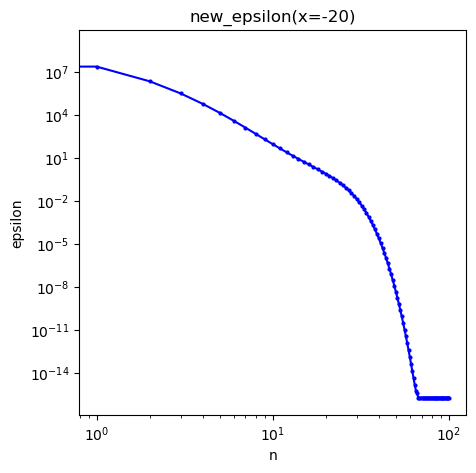

In [41]:
def new_exp_Taylor_expansion(x,n):
    if x >=0:
        return exp_Taylor_expansion(x,n)
    else: 
        return 1./exp_Taylor_expansion(-1*x,n)
    
new_exp_expansion_2 = [new_exp_Taylor_expansion(x_2,n) for n in ns ]
new_exp_expansion_2 = np.array(new_exp_expansion_2)
new_epsilon_2 = np.abs(new_exp_expansion_2-exp_np_2)/exp_np_2



plt.figure(figsize=(5,5))
plt.loglog(ns,new_epsilon_2,'blue',marker='o',markersize=2)
plt.title('new_epsilon(x=-20)')
plt.xlabel('n')
plt.ylabel('epsilon')
plt.show()

From the plot shown above, we demonstrate that this new approach is more accurate than directly calculating series when evaluating exponential function at a very large negative number.

<span style="font-size: 24px;"> 3. Errors in numerical differentiation </span>

First order forward difference is defined as:
$$f'  = \frac{f(x+\Delta x) -f(x) }{\Delta x} + O(\Delta x)$$
Second order central difference is defined as: 
$$f' = \frac{\frac{1}{2}f(x+\Delta x) -\frac{1}{2} f(x-\Delta x) } {\Delta x} + O(\Delta x^2)$$
Fourth order central difference is defined as: 
$$f' = \frac{\frac{1}{12} f(x-2\Delta x ) -\frac{2}{3} f(x-\Delta x) +\frac{2}{3} f(x+\Delta x) -\frac{1}{12} f(x+2\Delta x) }{\Delta x} +O(\Delta x^4) $$

In [42]:
# an array of delta_x
#lowest order of delta_x: -5, delta_x ~ 10^(-5)
lowest_order = -5 
#highest order of delta_x: -2,delta_x ~ 10^(-2)
highest_order = -0 
delta_xs = [] 
for i in range(lowest_order,highest_order+1):
    delta_xs_temp = np.array(range(1,10)) * 10**(i)
    delta_xs = np.append(delta_xs, delta_xs_temp)
#Calculate errors with first-order forward difference: 
errors_1_order_forward = np.abs( (np.sin(np.pi/4 + delta_xs) - np.sin(np.pi/4) ) /delta_xs - np.cos(np.pi/4) )

#Calculate errors with second-order central difference:
errors_2_order_central = np.abs( (np.sin(np.pi/4+delta_xs)-np.sin(np.pi/4-delta_xs))/(2*delta_xs) - np.cos(np.pi/4) )

#Calculate errors with fourth order central difference:
temp_numerator = 1/12.*np.sin(np.pi/4-2*delta_xs) -2/3. * np.sin(np.pi/4-delta_xs) + 2./3. * np.sin(np.pi/4+delta_xs) -1/12.*np.sin(np.pi/4+2*delta_xs)
errors_4_order_central = np.abs( temp_numerator/delta_xs - np.cos(np.pi/4) ) 



    

Text(0, 0.5, 'error')

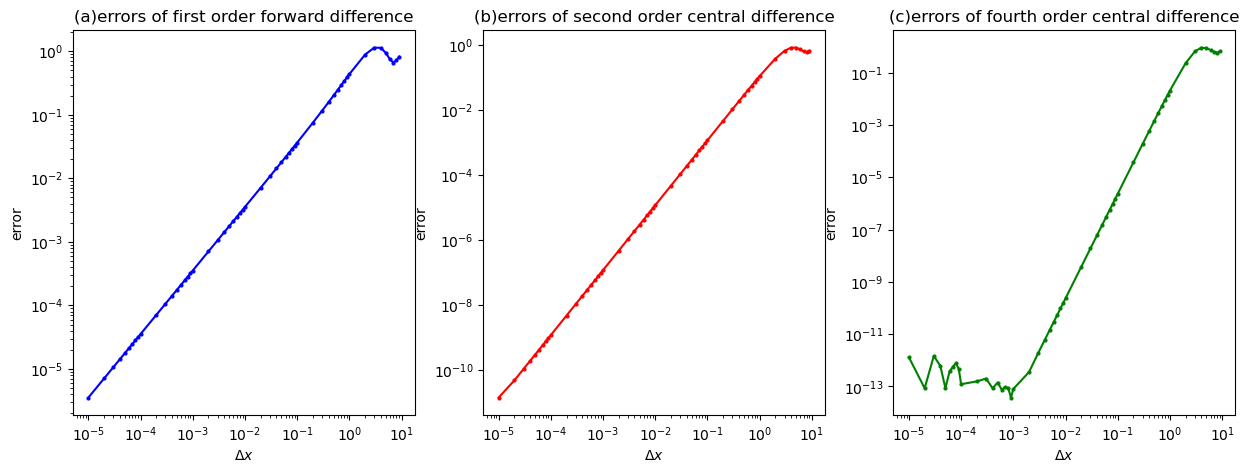

In [43]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].loglog(delta_xs,errors_1_order_forward,'blue',marker='o',markersize=2)
ax[0].set_title('(a)errors of first order forward difference')
ax[0].set_xlabel(r'$\Delta x$')
ax[0].set_ylabel('error')


ax[1].loglog(delta_xs,errors_2_order_central,'red',marker='o',markersize=2)
ax[1].set_title('(b)errors of second order central difference')
ax[1].set_xlabel(r'$\Delta x$')
ax[1].set_ylabel('error')


ax[2].loglog(delta_xs,errors_4_order_central,'green',marker='o',markersize=2)
ax[2].set_title('(c)errors of fourth order central difference')
ax[2].set_xlabel(r'$\Delta x$')
ax[2].set_ylabel('error')




Plot (a) shows the errors of first order forward difference. It is found that the slope is 1 and  
$$errors \propto \Delta x$$
Plot (b) shows the errors of seond order central difference. It is found that the slope is 2 and 
$$errors \propto (\Delta x)^2 $$
Plot (c) shows the errors of fourth order central difference. It is found that the slope is 4 and 
$$errors \propto (\Delta x)^4 $$

<span style="font-size: 24px;"> 4. Comparing methods of integration </span>

(a) Plot the integrand given by:
$$y=\sin ^2 (\sqrt{100x})$$

Text(0, 0.5, 'y')

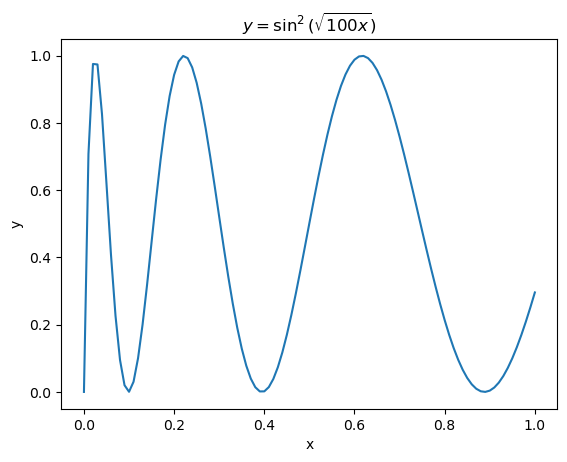

In [9]:
#Define the integrand function
def integrand_f(x):
    return np.sin(np.sqrt(100*x))**2
# define x used to sample:
xs = np.array(range(101)) / 100
fs = integrand_f(xs)

plt.plot(xs,fs)
plt.title(r"$y=\sin^2(\sqrt{100x})$")
plt.xlabel("x")
plt.ylabel("y")


(b)

Trapezoid rule: 

$$\int_a^bf(x) dx = ( \sum_{i=1}^{N-1}f_i +\frac{f_0}{2}+\frac{f_N}{2} ) \Delta x + c (\Delta x) ^2 $$

where $\Delta x = \frac{b-1}{N}$ , $f_i=f(a+i\Delta x)$ and $c$ is an constant. 

Firstly, start with one interval: $N_1 = 1$ ,so width of each interval is $h_1 = (b-a)$ and $I_1 = \frac{f(a)+f(b)}{2}*h_1$

Next double the number of intervals by $N_i= 2*N_{i-1}$ and $h_i = h_{i-1}/2$. Update the integration by using:
$$I_i = \frac{1}{2}I_{i-1} + h_i \sum_{k=1}^{N_{i-1}} f\left(a+(2k-1)h_i \right) $$
and error of $I_i$ is given by:
$$\epsilon_i =\frac{1}{3}(I_i-I_{i-1})$$

In [45]:
def Adaptive_Trapzoid_Integration(func,a,b,precision,max_loops = 100000):
    '''func is the Integrand, and a,b are the start,end point of the integration.'''
    #Start with a single interval
    #h_{i-1} the width of each subinterval
    h_i_1 = b-a
    #I_{i-1} the value of integration
    I_i_1 = ( func(a)+func(b) )/2 * h_i_1
    #N_{i-1} the number of subintervals
    N_i_1 = 1 
    #current loop_index
    i_loop = 0
    while 1:
        i_loop +=1 
        #Calculate N_i and h_i
        N_i = N_i_1 * 2
        h_i = h_i_1 / 2 
        
        temp = np.array( range(1,N_i_1+1) ) * 2 -1 
        x_new_points = temp * h_i + a 
        I_i = I_i_1 /2 + np.sum(func(x_new_points) )  *h_i

        #calculte error of I_i 
        epsilon_i = np.abs ( 1./3 * (I_i-I_i_1) ) 

        
        #check if error is satisfied: 
        if epsilon_i < precision :
            print("The number of intervals is ", N_i)
            return [I_i, epsilon_i]
        #The precision is not satistied, thus add more points
        #update N_i_1, I_i_1, h_i_1
        if i_loop > max_loops :
            print("required precision cann't be achieved within max loops")
            print("The error of returned value is: ",epsilon_i )
            return [I_i , epsilon_i]
        
        
        N_i_1 = N_i
        I_i_1 = I_i
        h_i_1 = h_i 

results = Adaptive_Trapzoid_Integration(integrand_f,0,1,10**(-6) ) 
print("The value of the integration :", results[0])
print("The error of the integration :", results[1])

The number of intervals is  4096
The value of the integration : 0.4558320582782708
The error of the integration : 4.7402554155991555e-07


(c) Romberg Integration 


In [47]:
def Romberg_Integration(func,a,b,precision,max_loops = 100000):
    #Romberg_form
    Romberg = []
    R_11 = ( func(a)+func(b) ) * (b-a) /2 
    Romberg.append(R_11)
    N = 2  # number of intervals 
    h = (b-a)/2 
    R_21 = R_11/2 + h * func(a+h)
    Romberg.append(R_21)
    
    
    for loop in range(max_loops):
        max_m =int (  len(Romberg) /2 )
        
        #calculate R(max_m+1,max_m+1)
        temp = Romberg[-1] + 1./(4**max_m-1)*(Romberg[-1]-Romberg[-2])
        Romberg.append(temp)      
        #calculate R(max_m+2,max_m+1)
        #firstly calculate R(max_m+2,1)
        Romberg[0]=Romberg[1]
        h = h/2 
        N = N *2 
        x_new =  ( np.array(range(1, int(N/2)+1))*2 -1 )*h +a
        Romberg[1] = Romberg[0]/2 + np.sum( func(x_new) ) * h 
        for i in range(1,max_m):
            Romberg[i*2] = Romberg[i*2 +1]
            Romberg[i*2+1] = Romberg[2*i-1] + 1/(4**i-1) *( Romberg[2*i-1] -Romberg[2*i-2] ) 
        temp = Romberg[ (max_m-1)*2 +1 ] + 1./(4**max_m-1)*(Romberg[(max_m-1)*2+1]-Romberg[(max_m-1)*2]) # this is R(max_m+2,max_m+1)
        Romberg.append(temp)
        if np.abs(1./(4**(max_m+1)-1)*(Romberg[-1]-Romberg[-2])) < precision:
            print("The number of intervals is ", N )
            return [temp,np.abs(1./(4**max_m-1)*(Romberg[-1]-Romberg[-2]))]
        if loop == (max_loops-1):
            print("Please increase max_loop to get required precision")
            return [temp,np.abs(1./(4**max_m-1)*(Romberg[-1]-Romberg[-2]))]
            
   
   
        
result = Romberg_Integration(integrand_f,0,1,10**(-6))
print("The value of the integration is ",result[0])
print("The error of the integration is ",result[1])            

The number of intervals is  64
The value of the integration is  0.45583248103309987
The error of the integration is  5.37524946264776e-08


(d) Gauss-Legendre Integration

In [48]:
def Gauss_Legendre_Integration(func,a,b,epsilon,max_loop = 30, n_init = 2 ):
    '''
    func is the integrand .
    [a,b] is integral interval.
    epsilon is the errors of integration.
    n_init is the initial number of nodes to be used. 
    max_loop is the max number of loops
    '''
    n = n_init 
    values= [] # the values of integration 
    for i in range(max_loop):
        t,w= np.polynomial.legendre.leggauss(n) # Here t is a array of nodes, and w is a array of corresponding weight
        x = (b-a)/2 *t + (a+b)/2
        f=func(x)
        value = np.sum(  f* w ) * (b-a)/2 
        values.append(value)
        if n == 2:
            n+=1
            continue
        if np.abs( values[i]- values[i-1] ) < epsilon : 
            print("The number of nodes is ", n)
            return [values[i], np.abs(values[i]- values[i-1])] #return result and estimated error
        n+=1 
    print("Cannot get an error below ",epsilon, ",please increase n_init and max_loop.")
    return [values[-1],np.abs(values[-1]-values[-2])] #return result and estimated error
    
result= Gauss_Legendre_Integration(integrand_f,0,1,10**(-6))
print("The value of integration is ",result[0])
print("The error of integration is ",result[1])

The number of nodes is  10
The value of integration is  0.4558325330654309
The error of integration is  1.2237811103377183e-07


<span style="font-size: 24px;"> 5.Integration to $\infty$ </span>

(a) Plot $\phi (x) = x^{a-1} e^{-x}$ for $a~=~2,3,4$

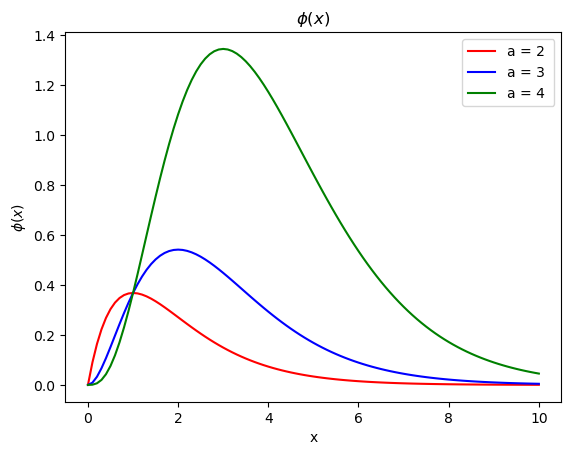

In [5]:
def phi_x(a,x):
    return x**(a-1)*np.exp(-x)
# number of sampling points 
N = 100
# range of x:[0,x_max]
x_max = 10
#sampling points 
xs = np.arange(N+1) * x_max/N
plt.plot(xs,phi_x(2,xs),color = 'red', label = 'a = 2 ')
plt.plot(xs,phi_x(3,xs),color = 'blue', label= 'a = 3 ')
plt.plot(xs,phi_x(4,xs),color = 'green',label = 'a = 4')
plt.title(r"$\phi (x)$")
plt.xlabel("x")
plt.ylabel(r"$\phi (x)$")
plt.legend()

(b) To find the maximum of $\phi$, calculate derivative of $\phi (x)$ with respect to $x$: 
$$\frac{d \phi(x)}{dx} = (a-1-x)x^{a-2}e^{-x}$$
Thus, when $x=a-1$, the integrand $\phi (x)$ gets its maximum.

(c) $x = a-1 $ when $z=\frac{1}{2}$ yields 
$$\frac{a-1}{a-1+c} = \frac{1}{2}$$

Therefore, $c=a-1$

(d) With transformation $z= \frac{x}{x+a-1}$, the gamma function can be rewritten as:
$$\Gamma (a) = \int_{0}^{\infty} x^{a-1}e^{-x} ~dx = (a-1)^a \int_{0}^{1}dz ~\exp \left\{ (a-1)\ln z -(a+1) \ln (1-z)-(a-1)\frac{z}{1-z}  \right\}$$

We are going to evaluate this intergation using Gauss-Legendre approach. 

In [52]:
#define new integrand:
def integrand_z (z,a):
    ''' 
    z is the variable of integration,
    a is the parameter of gamma function
    '''
    temp = (a-1) *np.log(z)-(a+1)*np.log(1-z)-(a-1) *z/(1-z)
    return np.exp(temp)

#define gamma function and evaluate the integration using Gauss-Legendre approach
def gamma_function(a,epsilon = 10**(-6)):
    '''
    a is the parameter of gamma function: gamma(a)
    epsilon is precision of the integration
    '''
     #integrand with given a 
    a_integrand_z = lambda z,a=a: integrand_z(z,a)
    integration = np.array ( Gauss_Legendre_Integration(a_integrand_z,0,1,epsilon/(a-1)**(a),max_loop = 50) )
    return (a-1)**(a) * integration
for a in range(2,10):
    result = gamma_function(a)
    print("gamma(",a,")=",result[0],", error: ",result[1]) 
    print("")

The number of nodes is  24
gamma( 2 )= 0.999999281530914 , error:  2.0402677669562053e-07

The number of nodes is  20
gamma( 3 )= 2.000002260422814 , error:  4.1102887360366935e-07

The number of nodes is  23
gamma( 4 )= 5.999999587653653 , error:  7.172571580421616e-07

The number of nodes is  23
gamma( 5 )= 24.000001445313483 , error:  8.777444193697193e-07

The number of nodes is  27
gamma( 6 )= 119.99999966371465 , error:  2.2372220449904529e-07

The number of nodes is  29
gamma( 7 )= 719.999999544328 , error:  4.6917359997067365e-07

The number of nodes is  32
gamma( 8 )= 5039.999999955358 , error:  6.892737582521848e-07

The number of nodes is  34
gamma( 9 )= 40319.99999969973 , error:  9.072755347006023e-07

